Jingtao Yang

My research question is "Which champions are the mostly commonly used"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("../data/raw/TFT_Master_MatchData.csv")

In [2]:
data.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [ ]:
# MileStone 3

In [ ]:
# Task 1

In [3]:
#Import Libraries
import numpy as np
data.shape

(79999, 8)

In [4]:
data.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [5]:
data.columns

Index(['gameId', 'gameDuration', 'level', 'lastRound', 'Ranked',
       'ingameDuration', 'combination', 'champion'],
      dtype='object')

In [6]:
data.nunique(axis=0)

gameId            10000
gameDuration       9966
level                 7
lastRound            38
Ranked                9
ingameDuration    69296
combination       26452
champion          79932
dtype: int64

In [7]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,gameDuration,level,lastRound,Ranked,ingameDuration
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,2155.497472,7.841323,33.531157,4.499331,1876.467332
std,133.843352,0.771159,4.784822,2.291910,267.107052
min,181.108841,3.000000,5.000000,0.000000,178.951233
25%,2063.781738,7.000000,30.000000,2.000000,1705.329529
50%,2148.008301,8.000000,34.000000,4.000000,1900.402954
75%,2242.993652,8.000000,37.000000,6.000000,2063.158691
max,2738.779053,9.000000,48.000000,8.000000,2730.512695


In [8]:
data.gameId.unique()

array(['KR_4242528808', 'KR_4242832362', 'KR_4245902754', ...,
       'KR_4367590765', 'KR_4367601148', 'KR_4367610629'], dtype=object)

In [9]:
data.gameDuration.unique()

array([2233.44995117, 2229.640625  , 2207.38305664, ..., 2090.05200195,
       2259.52197266, 2171.34399414])

In [10]:
data.level.unique()

array([8, 9, 7, 6, 5, 4, 3], dtype=int64)

In [11]:
data.lastRound.unique()

array([37, 35, 33, 31, 27, 26, 38, 30, 24, 28, 34, 40, 23, 16, 21, 19, 20,
       12, 11, 41, 14, 42, 45, 25, 13, 47, 18, 44, 36, 15, 32, 29, 39, 17,
       10, 22,  5, 48], dtype=int64)

In [12]:
data.Ranked.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 0], dtype=int64)

In [13]:
data.ingameDuration.unique()

array([2225.2434082 , 2138.76342773, 2003.8659668 , ..., 1658.85058594,
       1562.578125  , 1264.66699219])

In [14]:
data.combination.unique()

array(["{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'Set3_Celestial': 3, 'Set3_Mystic': 4, 'StarGuardian': 2}",
       "{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Blademaster': 1, 'Set3_Brawler': 4, 'Set3_Celestial': 1, 'Set3_Mystic': 2, 'Set3_Void': 1, 'StarGuardian': 1, 'Valkyrie': 2}",
       "{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'StarGuardian': 1, 'Starship': 1, 'Valkyrie': 1}",
       ...,
       "{'Chrono': 3, 'Cybernetic': 1, 'DarkStar': 1, 'ManaReaver': 2, 'Protector': 2, 'Rebel': 1, 'Set3_Blademaster': 3, 'Set3_Brawler': 1, 'Set3_Celestial': 4, 'Sniper': 2, 'TemplateTrait': 1}",
       "{'Protector': 4, 'Rebel': 3, 'Set3_Blademaster': 2, 'Set3_Celestial': 2, 'Set3_Mystic': 2, 'StarGuardian': 2}",
       "{'Cybernetic': 1, 'DarkStar': 1, 'Demolitionist': 1, 'Infiltrator': 4, 'MechPilot': 1, 'Set3_Blademaster': 1, 'Set3_Void': 1, 'Valkyrie': 2}"],
      dtype=object)

In [15]:
data.champion.unique()

array(["{'JarvanIV': {'items': [12], 'star': 3}, 'Sona': {'items': [46], 'star': 3}, 'Rakan': {'items': [37, 45], 'star': 3}, 'XinZhao': {'items': [25, 66, 13], 'star': 3}, 'Neeko': {'items': [], 'star': 2}, 'Karma': {'items': [], 'star': 2}, 'Soraka': {'items': [], 'star': 1}, 'Lulu': {'items': [99, 47, 55], 'star': 2}}",
       "{'Malphite': {'items': [], 'star': 2}, 'Blitzcrank': {'items': [], 'star': 2}, 'Vi': {'items': [], 'star': 1}, 'Jinx': {'items': [56, 13, 29], 'star': 2}, 'Soraka': {'items': [], 'star': 2}, 'ChoGath': {'items': [36, 6, 27], 'star': 2}, 'Kayle': {'items': [], 'star': 2}, 'MissFortune': {'items': [37, 34], 'star': 1}, 'Lulu': {'items': [17], 'star': 2}}",
       "{'Malphite': {'items': [], 'star': 2}, 'Blitzcrank': {'items': [], 'star': 2}, 'Ezreal': {'items': [], 'star': 2}, 'Vi': {'items': [36], 'star': 2}, 'Jinx': {'items': [13, 57, 69], 'star': 1}, 'ChoGath': {'items': [], 'star': 2}, 'MissFortune': {'items': [33, 69], 'star': 2}, 'AurelionSol': {'items': 

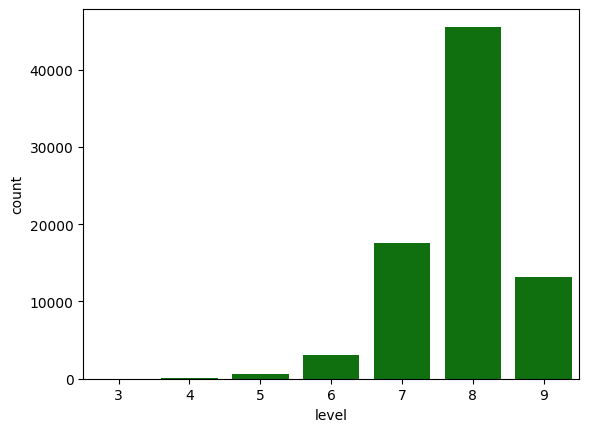

In [19]:
plot3=sns.countplot(data=data,x='level', color='green')

In [ ]:
print('The numbers of the levels has been shown. 8 is where the most player ended up with')

<AxesSubplot: xlabel='ingameDuration', ylabel='Ranked'>

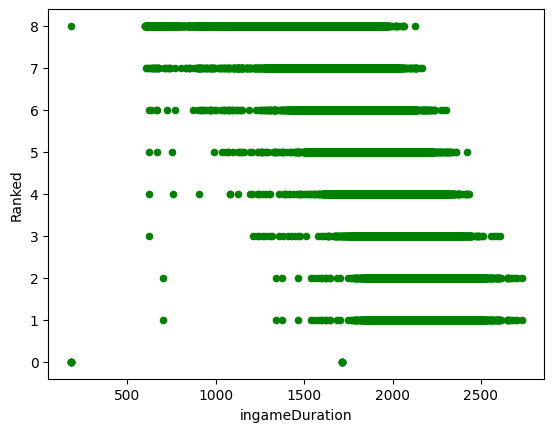

In [25]:
data.plot(kind='scatter', x='ingameDuration', y='Ranked', color = 'green')

In [28]:
print('This plot shows the relationship between in game duration and the rank of the players. We can see that there is a positive relationship between the rank and ingameDuration.')

This plot shows the relationship between in game duration and the rank of the players. We can see that there is a positive relationship between the rank and ingameDuration.


<AxesSubplot: xlabel='ingameDuration', ylabel='lastRound'>

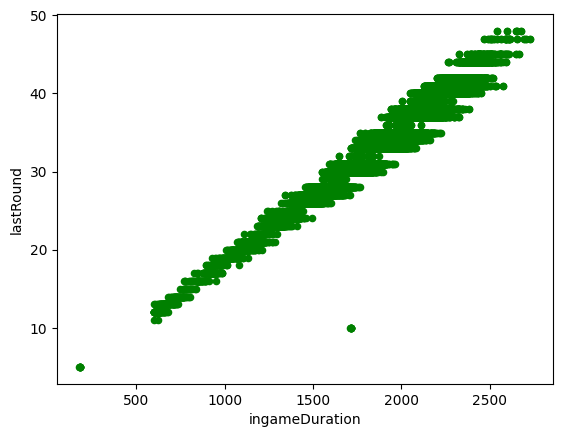

In [26]:
data.plot(kind='scatter', x='ingameDuration', y='lastRound', color='green')

In [ ]:
print('The plot shows the relatonship between ingameDuration and lastRound. It is a positive relationsihp.')'

In [ ]:
# Task 2

In [72]:
df=data.drop(["gameId","gameDuration","level","lastRound","ingameDuration", "combination"], axis="columns")
df=dataNew.drop(df[df.Ranked!=1].index)
df=dataNew.reset_index()
df.head()

,level_0,index,Ranked,champion
0,0,0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,1,1,2,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,2,2,3,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,3,3,4,"{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,4,4,5,"{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [73]:
import ast

In [74]:
#convert combination column from str to dict
df['championl']=df['champion'].astype('str')
df['championl']=df['championl'].apply(lambda x: ast.literal_eval(x))
df=df.drop(["champion"], axis="columns")
df.head()

,level_0,index,Ranked,championl
0,0,0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,1,1,2,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,2,2,3,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,3,3,4,"{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,4,4,5,"{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [75]:
clist=[]
clist=df['championl'].apply(lambda x: list(set(x)))
chs=[]
for i in clist:
    chs=list(set(chs+i))
sorted(chs)

['Ahri',
 'Annie',
 'Ashe',
 'AurelionSol',
 'Blitzcrank',
 'Caitlyn',
 'ChoGath',
 'Darius',
 'Ekko',
 'Ezreal',
 'Fiora',
 'Fizz',
 'Gangplank',
 'Graves',
 'Irelia',
 'JarvanIV',
 'Jayce',
 'Jhin',
 'Jinx',
 'KaiSa',
 'Karma',
 'Kassadin',
 'Kayle',
 'KhaZix',
 'Leona',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'MasterYi',
 'MissFortune',
 'Mordekaiser',
 'Neeko',
 'Poppy',
 'Rakan',
 'Rumble',
 'Shaco',
 'Shen',
 'Sona',
 'Soraka',
 'Syndra',
 'Thresh',
 'TwistedFate',
 'VelKoz',
 'Vi',
 'WuKong',
 'Xayah',
 'Xerath',
 'XinZhao',
 'Yasuo',
 'Ziggs',
 'Zoe']

In [77]:
df2=df
# data2=pd.concat([data1,pd.DataFrame(columns=sorted(uniqueCombination))])
df2[[chs]]=None
cols=['Ranked','championl']+sorted(chs)
df2=df2[cols]
df2.head()

,Ranked,championl,Ahri,Annie,Ashe,AurelionSol,Blitzcrank,Caitlyn,ChoGath,Darius,...,TwistedFate,VelKoz,Vi,WuKong,Xayah,Xerath,XinZhao,Yasuo,Ziggs,Zoe
0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,"{'Leona': {'items': [], 'star': 2}, 'Mordekais...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,"{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [80]:
for i in range(len(df2.championl)):
    keylist=list(df2.championl[i].keys())
    for k in keylist:
        value=df2.championl[i].get(k)
        df2.at[i,k]=value
    
df2.head()

,Ranked,championl,Ahri,Annie,Ashe,AurelionSol,Blitzcrank,Caitlyn,ChoGath,Darius,...,TwistedFate,VelKoz,Vi,WuKong,Xayah,Xerath,XinZhao,Yasuo,Ziggs,Zoe
0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"{'items': [25, 66, 13], 'star': 3}",None,None,None
1,2,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",None,None,None,None,"{'items': [], 'star': 2}",None,"{'items': [36, 6, 27], 'star': 2}",None,...,None,None,"{'items': [], 'star': 1}",None,None,None,None,None,None,None
2,3,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",None,None,None,"{'items': [48], 'star': 2}","{'items': [], 'star': 2}",None,"{'items': [], 'star': 2}",None,...,None,None,"{'items': [36], 'star': 2}",None,None,None,None,None,None,None
3,4,"{'Leona': {'items': [], 'star': 2}, 'Mordekais...",None,None,"{'items': [14, 3], 'star': 2}",None,None,None,None,None,...,None,None,None,"{'items': [], 'star': 2}",None,None,None,None,None,None
4,5,"{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...",None,"{'items': [], 'star': 3}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
def load_and_process(url_or_path_to_csv_file):


    dft1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .drop(["gameId","gameDuration","level","lastRound","ingameDuration","combination"], axis="columns")
        .loc[lambda x: x['Ranked']==1]
        .reset_index()
        .drop(["index"], axis="columns")
      )

    dft2 = (
        dft11
        .assign(combination_dict=lambda df:
            df['champion'].apply(lambda x: ast.literal_eval(x)))
        .drop(["champion"], axis="columns")
      )

    # Make sure to return the latest dataframe

    return dft2